# Sala de exercício Alv

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, clear_output, Image

import matplotlib.pyplot as plt

import plotly.offline as py
import datetime,calendar

%matplotlib inline

dfSE = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSVj6ozH2kAZG6n_vJb4PR__x7Shz4AL5sRFO59R_KohF1CfQxMs4k5oIsI4hZq5yHofAi4rJwn4uAv/pub?gid=1177224068&single=true&output=csv')

## Preparação dos dados
dfSE.columns=['data', 'dataOld', 'hora', 'mulheres','homens', 'cardio','abdominal', 'ombros','peito', 'costas','pernas']
dfSE.fillna(0,inplace=True)

### Colocar tudo em ints
cols = ['mulheres', 'homens','cardio', 'abdominal', 'ombros', 'peito', 'costas', 'pernas', 'total']

# Criar uma coluna nova
dfSE['total']=dfSE.mulheres+dfSE.homens
#dfSE.head()
for col in cols:
    dfSE[col] = dfSE[col].astype(int)


### Converter hora para tempo
dfSE['hora'] = pd.to_datetime(dfSE['hora'])
dfSE['data'] = pd.to_datetime(dfSE['data'])
### Calcular só hora

#Vamos retirar as meias horas
dfSE['hora']=dfSE['hora'].apply(lambda x: x.hour)

### Calcular o dia da semana

# Por extenso
#dfSEAlv['diaSemana']=dfSEAlv['data'].apply(lambda x: x.day_name(locale='pt'))
# Vamos calcular o dia da semana 0 é segunda
dfSE['diaSemana']=dfSE['data'].apply(lambda x: x.weekday())

## Analise inicial

print('Data inicio: ',dfSE.data.min(),'Data fim:',dfSE.data.max())

#Os dados são referentes ao período entre data inicio e data fim. Vamos confirmar algums dados

#Vamos calcular totais e ordenar por hora
#dfSE.hora.value_counts().reset_index().sort_values('index')

Data inicio:  2019-12-09 07:14:16 Data fim: 2020-03-13 21:08:32


### Número de clientes por hora

A barra preta representa o intervalo de confiança com 95%, i.e. o número de clientes tem uma estimativa limite minimo e máximo por hora de acordo com o registos nessa hora

In [2]:
dataInicio=dfSE.data.min()
dataFim=dfSE.data.max()

#py.init_notebook_mode()

dados=dfSE[(dfSE.data>=pd.to_datetime(dataInicio.value)) & (dfSE.data<=pd.to_datetime(dataFim.value))]
funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]

def f(var,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.barplot(x='hora',y=var,data=dados,palette='rainbow',estimator=funcao).set_title('Sala exercício Alverca - '+var)
    plt.xticks(np.arange(15),(7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 16))
    fig = plt.gcf() # "Get current figure"
    plt.show()
    #py.iplot_mpl(fig)

interact(f, var=cols, funcao=funcao);

interactive(children=(Dropdown(description='var', options=('mulheres', 'homens', 'cardio', 'abdominal', 'ombro…

### Representação com boxplots do número de clientes 

1. Está representado a mediana em todas as horas - barra verde
2. Quartil 1 e Quartil 3
3. Outliers todos os valores superiores a Q3 + ((Q3-Q1)*3) e inferiores a Q1 - ((Q3 - Q1) * 3)

In [3]:
def f(var):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.boxplot(x='hora',y=var,data=dfSE,palette='rainbow').set_title('Sala exercício Alverca - '+var)
    fig = plt.gcf() # "Get current figure"
    plt.show()
    #py.iplot_mpl(fig)

interact(f, var=cols);

interactive(children=(Dropdown(description='var', options=('mulheres', 'homens', 'cardio', 'abdominal', 'ombro…

### Quantas pessoas por dia da semana?

In [4]:
#0 é segunda-feira 6 é domingo https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html

funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]
def f(var,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.lineplot(x='diaSemana',y=var,data=dfSE,palette='rainbow',estimator=funcao).set_title('Sala exercício Alverca - '+var)
    plt.xticks(np.arange(7),('seg','ter','qua','qui','sex','sab','dom'))
    fig = plt.gcf() # "Get current figure"
    plt.show()
    #py.iplot_mpl(fig)

interact(f, var=cols, funcao=funcao);

interactive(children=(Dropdown(description='var', options=('mulheres', 'homens', 'cardio', 'abdominal', 'ombro…

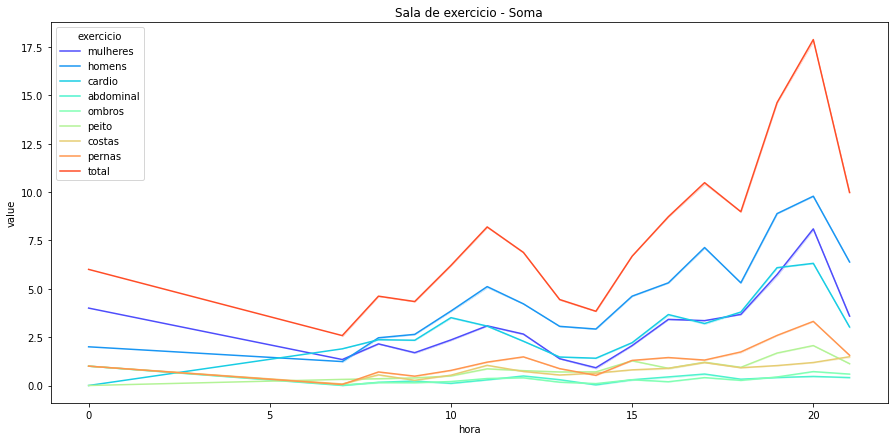

In [5]:
dfMelt=pd.melt(dfSE,id_vars=['hora'],value_vars=cols,var_name='exercicio')

plt.rcParams['figure.figsize'] = [15, 7]
sns.lineplot(x='hora',y='value',hue='exercicio',data=dfMelt,palette='rainbow',estimator='mean',ci=0).set_title('Sala de exercicio - Soma');
fig = plt.gcf()

# Dados recolhidos sala de exercício RM

In [6]:
dfSEAlv = dfSE.copy() # Fazer uma cópia deste dataframe
dfSERM = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTrIE1Jj6T7Lvm2lMQknzc-zwVBveY1ZMCfsQ7AE5gzDUMTTz82GbjXm3Jw5ja1oOwWehpDq_EmxD_I/pub?gid=1295975420&single=true&output=csv')

## Preparação dos dados

dfSERM.columns=['data', 'dataOld', 'hora', 'mulheres','homens', 'cardio','abdominal', 'ombros','peito', 'costas','pernas']

dfSERM.fillna(0,inplace=True)

# Criar uma coluna nova
dfSERM.mulheres = dfSERM.mulheres.astype(int)
dfSERM['total']=dfSERM.mulheres+dfSERM.homens
#dfSE.head()

### Colocar tudo em ints

cols = ['mulheres', 'homens','cardio', 'abdominal', 'ombros', 'peito', 'costas', 'pernas', 'total']
for col in cols:
    dfSERM[col] = dfSERM[col].astype(int)

### Converter hora para tempo

dfSERM['hora'] = pd.to_datetime(dfSERM['hora'])
dfSERM['data'] = pd.to_datetime(dfSERM['data'])

### Calcular só hora

#Vamos retirar as meias horas
dfSERM['hora']=dfSERM['hora'].apply(lambda x: x.hour)

### Calcular o dia da semana

# Por extenso
#dfSEAlv['diaSemana']=dfSEAlv['data'].apply(lambda x: x.day_name(locale='pt'))
# Vamos calcular o dia da semana 0 é segunda
dfSERM['diaSemana']=dfSERM['data'].apply(lambda x: x.weekday())

## Analise inicial

print('Data inicio: ',dfSERM.data.min(),'Data fim:',dfSERM.data.max())

plt.rcParams['figure.figsize'] = [15, 7]

Data inicio:  2019-12-04 10:31:26 Data fim: 2020-03-13 16:26:29


### Número de clientes por hora

A barra preta representa o intervalo de confiança com 95%, i.e. o número de clientes tem uma estimativa limite minimo e máximo por hora de acordo com o registos nessa hora

In [7]:
dataInicio=dfSERM.data.min()
dataFim=dfSERM.data.max()

#py.init_notebook_mode()

dados=dfSERM[(dfSERM.data>=pd.to_datetime(dataInicio.value)) & (dfSERM.data<=pd.to_datetime(dataFim.value))]
funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]
def f(var,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.barplot(x='hora',y=var,data=dados,palette='rainbow',estimator=funcao).set_title('Sala exercício Rio Maior - '+var)
    plt.xticks(np.arange(15),(7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 16))
    fig = plt.gcf() # "Get current figure"
    plt.show()
    #py.iplot_mpl(fig)

interact(f, var=cols, funcao=funcao);

interactive(children=(Dropdown(description='var', options=('mulheres', 'homens', 'cardio', 'abdominal', 'ombro…

### Representação com boxplots do número de clientes 

1. Está representado a mediana em todas as horas - barra verde
2. Quartil 1 e Quartil 3
3. Outliers todos os valores superiores a Q3 + ((Q3-Q1)*3) e inferiores a Q1 - ((Q3 - Q1) * 3)

No total os outliers representam valores superiores a 15 são com mais procura na sala de exercício

In [8]:
def f(var):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.boxplot(x='hora',y=var,data=dfSERM,palette='rainbow').set_title('Sala exercício Rio Maior - '+var)
    fig = plt.gcf() # "Get current figure"
    plt.show()
    #py.iplot_mpl(fig)

interact(f, var=cols);

interactive(children=(Dropdown(description='var', options=('mulheres', 'homens', 'cardio', 'abdominal', 'ombro…

### Quantas pessoas por dia da semana?

In [9]:
#0 é segunda-feira 6 é domingo https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html

funcao = [('soma',np.sum),('media',np.mean),('mediana',np.median), ('máx',np.max) ,('min',np.min)]
def f(var,funcao):
    plt.rcParams['figure.figsize'] = [15, 4]
    sns.lineplot(x='diaSemana',y=var,data=dfSERM,palette='rainbow',estimator=funcao).set_title('Sala exercício Rio Maior - '+var)
    plt.xticks(np.arange(7),('seg','ter','qua','qui','sex','sab','dom'))
    fig = plt.gcf() # "Get current figure"
    plt.show()
    #py.iplot_mpl(fig)

interact(f, var=cols, funcao=funcao);

interactive(children=(Dropdown(description='var', options=('mulheres', 'homens', 'cardio', 'abdominal', 'ombro…

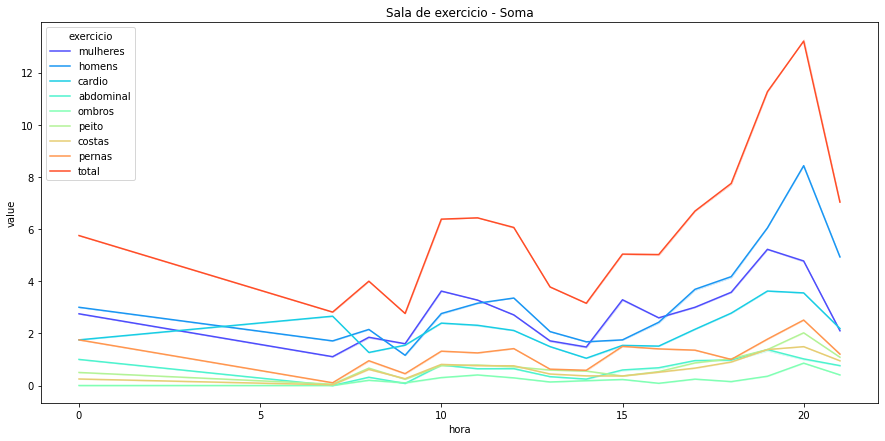

In [10]:
dfMelt=pd.melt(dfSERM,id_vars=['hora'],value_vars=cols,var_name='exercicio')

plt.rcParams['figure.figsize'] = [15, 7]
sns.lineplot(x='hora',y='value',hue='exercicio',data=dfMelt,palette='rainbow',estimator='mean',ci=0).set_title('Sala de exercicio - Soma');
fig = plt.gcf()